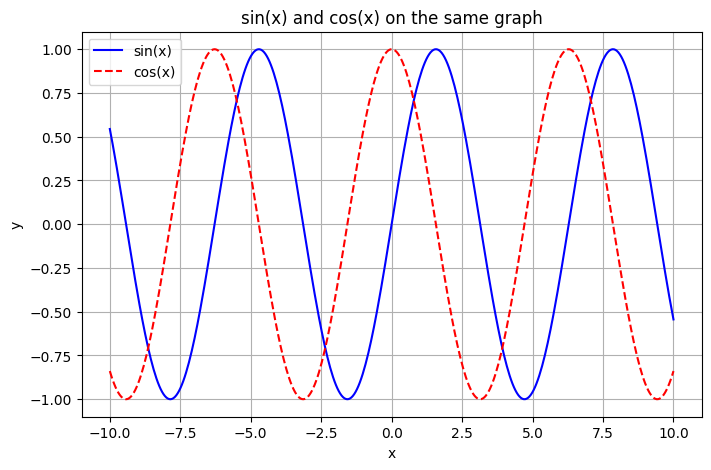

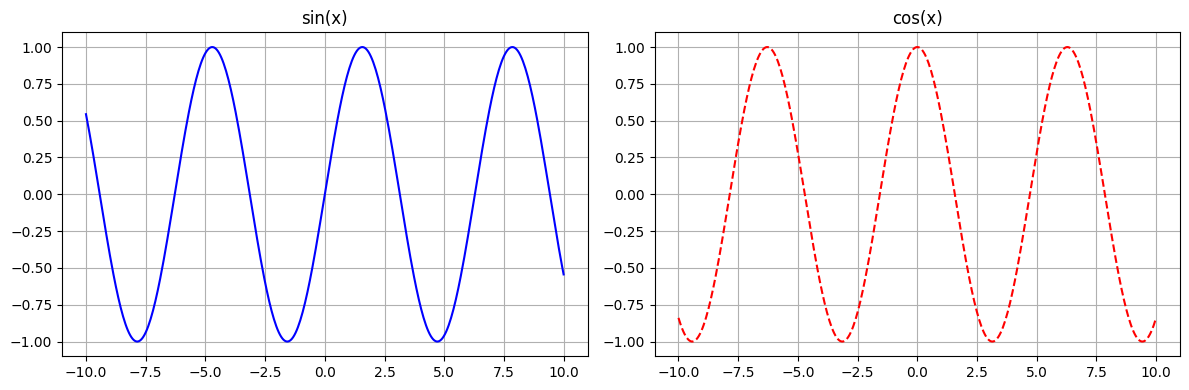

Columns in file: ['Unnamed: 0', 'primary_site', 'ITGA10', 'ITGAD', 'ITGAM', 'ITGA3', 'ITGBL1', 'ITGAE', 'ITGA2', 'ITGB3']
                     Unnamed: 0 primary_site  ITGA10   ITGAD   ITGAM   ITGA3  \
0  GTEX-13QIC-0011-R1a-SM-5O9CJ        Brain  0.5763 -6.5064  2.2573  0.7832   
1      GTEX-1399S-1726-SM-5L3DI         Lung  4.9137 -3.6259  4.7307  7.1584   
2       GTEX-PWCY-1326-SM-48TCU        Ovary  2.3953 -5.0116  1.4547  4.2593   
3       GTEX-QXCU-0626-SM-2TC69         Lung  4.0541 -2.3147  4.5053  7.5651   
4       GTEX-ZA64-1526-SM-5CVMD       Breast  2.0569 -2.4659  3.3993  3.1311   

   ITGBL1   ITGAE   ITGA2   ITGB3  ...   ITGA6  ITGA2B   ITGB1   ITGAL  \
0  1.0363  4.6035  2.5731 -2.8262  ...  2.8562  1.3846  5.8430  1.1316   
1  1.7702  4.9556  1.9149  2.6067  ...  4.2412  4.1211  7.7256  4.4900   
2 -0.7346  4.4149  0.2642  1.5216  ...  3.6816  1.5465  7.2964 -0.9406   
3  4.1788  4.1772  5.3695  1.8444  ...  4.9631  1.9149  7.9947  3.3911   
4  3.0074  4.4977 -1.7809  

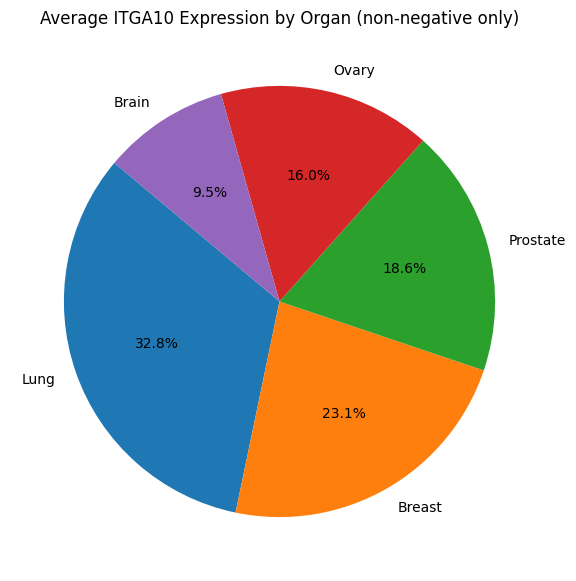

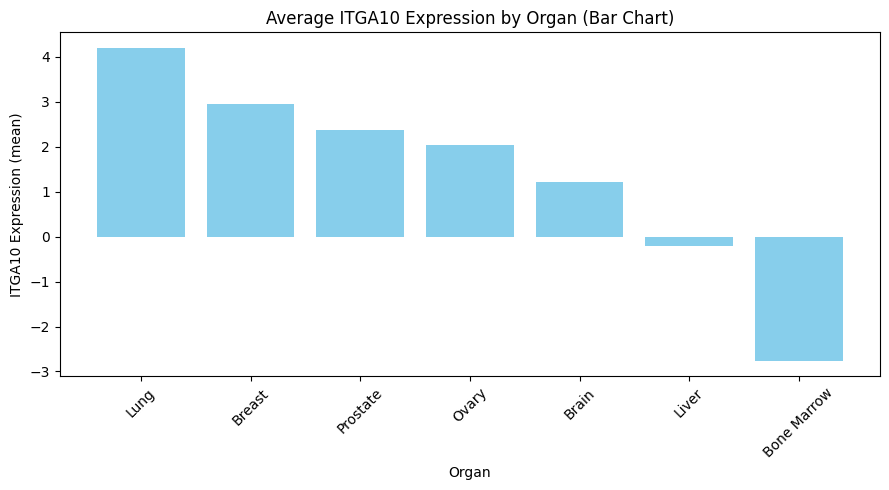

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# PART 1: Plotting two mathematical functions
# -------------------------------------------------------------

x = np.linspace(-10, 10, 400)
y1 = np.sin(x)
y2 = np.cos(x)

# (1) Both functions in the same graph
plt.figure(figsize=(8,5))
plt.plot(x, y1, label='sin(x)', color='blue', linestyle='-')
plt.plot(x, y2, label='cos(x)', color='red', linestyle='--')
plt.title('sin(x) and cos(x) on the same graph')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# (2) Two functions side by side
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(x, y1, color='blue')
axes[0].set_title('sin(x)')
axes[0].grid(True)
axes[1].plot(x, y2, color='red', linestyle='--')
axes[1].set_title('cos(x)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# PART 2: Reading Excel data and preparing plots
# -------------------------------------------------------------

file_path = r'C:\Users\carro\Downloads\gtex_integrin_7_organs.xlsx'
df = pd.read_excel(file_path)

# Check the data
print("Columns in file:", list(df.columns)[:10])  # show first 10 columns
print(df.head())

# -------------------------------------------------------------
# Pick a gene to visualize (you can change this name)
# -------------------------------------------------------------

gene = 'ITGA10'

# Compute mean expression per tissue
mean_expr = df.groupby('primary_site')[gene].mean().sort_values(ascending=False)

# -------------------------------------------------------------
# PIE PLOT
# -------------------------------------------------------------

mean_expr_pos = mean_expr[mean_expr > 0]

plt.figure(figsize=(7,7))
plt.pie(mean_expr_pos, labels=mean_expr_pos.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Average {gene} Expression by Organ (non-negative only)')
plt.show()


# -------------------------------------------------------------
# BAR PLOT
# -------------------------------------------------------------

plt.figure(figsize=(9,5))
plt.bar(mean_expr.index, mean_expr.values, color='skyblue')
plt.title(f'Average {gene} Expression by Organ (Bar Chart)')
plt.xlabel('Organ')
plt.ylabel(f'{gene} Expression (mean)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()